In [2]:
import scipy.stats as st
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.datasets import load_diabetes
from sklearn.datasets import fetch_openml

housing = fetch_openml(name="house_prices", as_frame=True)
sale_price = housing.target
data = housing.data

/Users/zoria/anaconda3/lib/python3.11/site-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


# Завдання 1

Побудуйте лінійну регресію використовуючи SalePrice як залежну змінну y та ті самі 3-5 неперервних колонок, які ви використовували у Завданні 3 з минулого домашнього, як незалежні змінні Х. Опишить результати:

a. Чи залежність між залежною та незалежними змінними на основі
коефіцієнтів у регресії збігається з попереднім аналізом?

b. Проінтерпетуйте значення коефіцієнтів та інтервалів довіри коефіцієнтів.

In [359]:
data['SalePrice'] = sale_price

selected_columns = ['SalePrice', 'LotArea', 'GarageArea', 'TotalBsmtSF', 'OpenPorchSF']
selected_data = data[selected_columns]

print(selected_data.head())

   SalePrice  LotArea  GarageArea  TotalBsmtSF  OpenPorchSF
0     208500     8450         548          856           61
1     181500     9600         460         1262            0
2     223500    11250         608          920           42
3     140000     9550         642          756           35
4     250000    14260         836         1145           84


In [360]:
from statsmodels.api import OLS
from statsmodels.api import add_constant

ols = OLS(data.SalePrice, add_constant(data[["LotArea"]]))
ols = ols.fit()
preds = ols.predict(add_constant(data[["LotArea"]]))

ols.params

const      158836.151897
LotArea         2.099972
dtype: float64

In [361]:
from statsmodels.formula.api import ols as OLS_formula

ols = OLS_formula(data = data, formula = "SalePrice ~ LotArea")
ols = ols.fit()
preds = ols.predict(data) 

ols.params

Intercept    158836.151897
LotArea           2.099972
dtype: float64

Text(0, 0.5, 'SalePrice (y)')

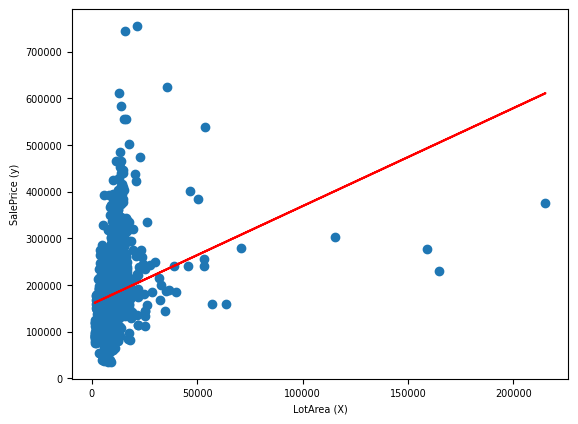

In [362]:
plt.scatter(data.LotArea, data.SalePrice)
plt.plot(data.LotArea, preds, c = "r")

plt.xlabel("LotArea (X)")
plt.ylabel("SalePrice (y)")

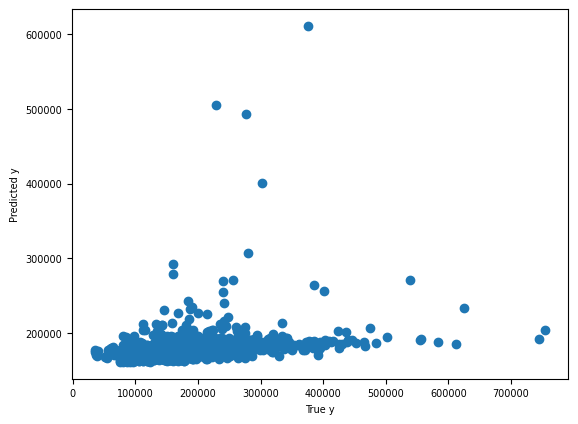

In [363]:
plt.scatter(data.SalePrice, preds)
plt.xlabel("True y")
plt.ylabel("Predicted y")
plt.show()

In [364]:
from statsmodels.formula.api import ols as OLS_formula

ols = OLS_formula(data = data, formula = "SalePrice ~ GarageArea")
ols = ols.fit()
preds = ols.predict(data) 

ols.params

Intercept     71357.421407
GarageArea      231.645615
dtype: float64

Text(0, 0.5, 'SalePrice (y)')

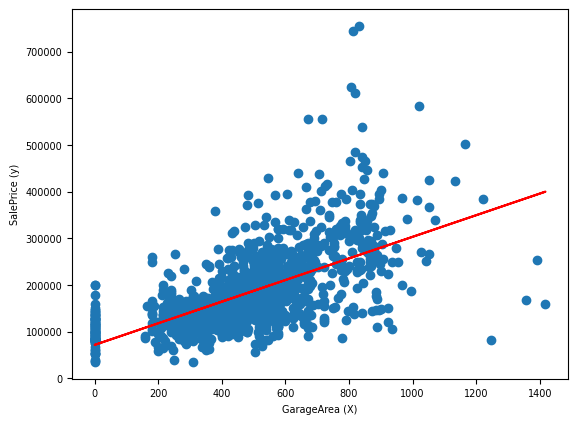

In [365]:
plt.scatter(data.GarageArea, data.SalePrice)
plt.plot(data.GarageArea, preds, c = "r")

plt.xlabel("GarageArea (X)")
plt.ylabel("SalePrice (y)")

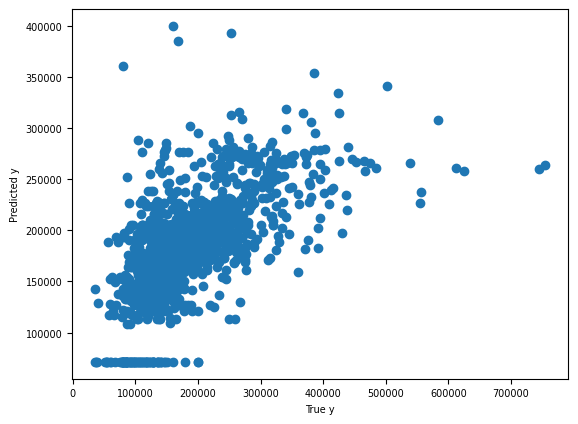

In [366]:
plt.scatter(data.SalePrice, preds)
plt.xlabel("True y")
plt.ylabel("Predicted y")
plt.show()

In [367]:
from statsmodels.formula.api import ols as OLS_formula

ols = OLS_formula(data = data, formula = "SalePrice ~ TotalBsmtSF")
ols = ols.fit()
preds = ols.predict(data) 

ols.params

Intercept      63430.628546
TotalBsmtSF      111.109604
dtype: float64

Text(0, 0.5, 'SalePrice (y)')

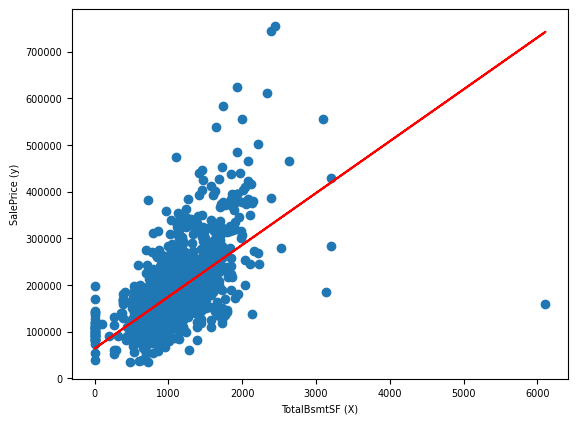

In [368]:
plt.scatter(data.TotalBsmtSF, data.SalePrice)
plt.plot(data.TotalBsmtSF, preds, c = "r")

plt.xlabel("TotalBsmtSF (X)")
plt.ylabel("SalePrice (y)")

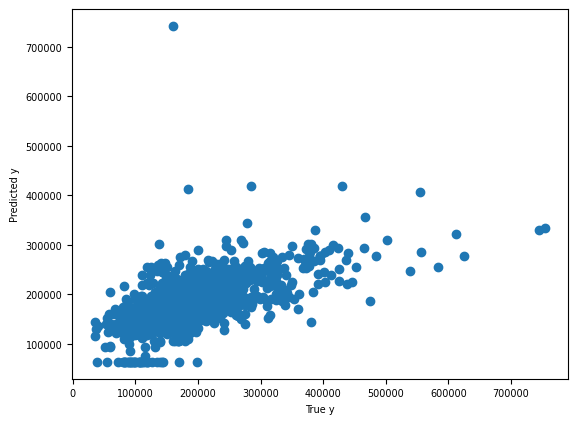

In [369]:
plt.scatter(data.SalePrice, preds)
plt.xlabel("True y")
plt.ylabel("Predicted y")
plt.show()

In [370]:
from statsmodels.formula.api import ols as OLS_formula

ols = OLS_formula(data = data, formula = "SalePrice ~ OpenPorchSF")
ols = ols.fit()
preds = ols.predict(data) 

ols.params

Intercept      163250.068741
OpenPorchSF       378.718890
dtype: float64

Text(0, 0.5, 'SalePrice (y)')

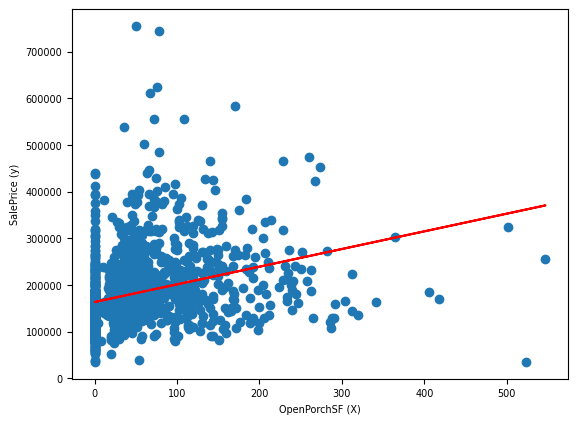

In [371]:
plt.scatter(data.OpenPorchSF, data.SalePrice)
plt.plot(data.OpenPorchSF, preds, c = "r")

plt.xlabel("OpenPorchSF (X)")
plt.ylabel("SalePrice (y)")

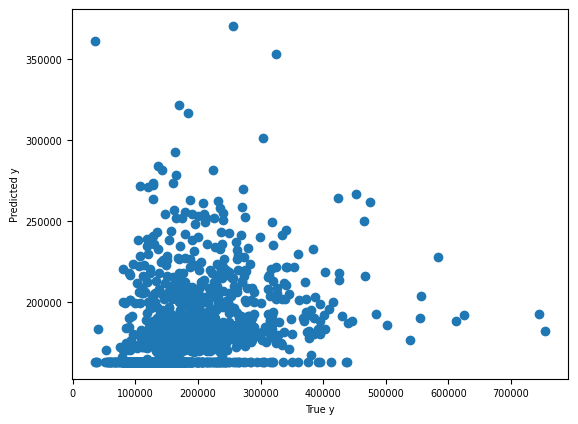

In [372]:
plt.scatter(data.SalePrice, preds)
plt.xlabel("True y")
plt.ylabel("Predicted y")
plt.show()

In [373]:
ols = OLS_formula(data = data, formula = "SalePrice ~ LotArea + GarageArea + TotalBsmtSF + OpenPorchSF")
ols = ols.fit()
preds = ols.predict(data)

ols.params

Intercept      26439.297415
LotArea            0.682662
GarageArea       148.763032
TotalBsmtSF       66.342242
OpenPorchSF      145.482706
dtype: float64

In [374]:
print(ols.summary(alpha = 0.1))

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.535
Model:                            OLS   Adj. R-squared:                  0.534
Method:                 Least Squares   F-statistic:                     419.1
Date:                Fri, 03 Nov 2023   Prob (F-statistic):          2.67e-240
Time:                        16:51:04   Log-Likelihood:                -17984.
No. Observations:                1460   AIC:                         3.598e+04
Df Residuals:                    1455   BIC:                         3.601e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|       [0.05       0.95]
-------------------------------------------------------------------------------
Intercept    2.644e+04   4105.193      6.440      

Коефіцієнт для площі території є додатнім, отже ми можемо говорити про залежність між площею території та ціною на будинок. Аналогічно, також є додатніми коефіцієнти для площі гаражу, площі підвалу та площі відкритої веранди. Відповідно, існує залежність між ціною на будинок та згаданими вище категоріями. З ймовірністю 90% коефіцієнт для площі території може бути від 0.4 до 0.9, для площі гаражу від 136 до 161, для площі підвалу від 60 до 72, для площі відкритої веранди від 108 до 182. Тобто, в середньому зі збільшенням площі території на 1 кв.фут ціна на будинок піднімається в середньому на 0.4 - 0.9 доларів. Аналогічно для інших категорій, зі збільшенням площі гаражу на 1 кв.фут ціна на будинок піднімається в середньому на 136 - 161 долар, і тд. Усі наші інтервали додатні, тому можна стверджувати, що залежність точно існує.

В попередньому домашньому завданні, ми прийшли до висновків, що існує кореляція між ціною на будинок та площею території, гаражу, підвалу та відкритої веранди. В цьому завданні, ми ще раз підтвердили це.

# Завдання 2

Додайте будь-яку категоріальну колонку до лінійної регресії. Обов’язково використайте перетворення на dummy колонки. Проінтретуйте значення коефіцієнтів.

In [375]:
ols = OLS_formula(data = data, formula = "SalePrice ~ LotArea + GarageArea + TotalBsmtSF + OpenPorchSF + C(Foundation)")
ols = ols.fit()

print(ols.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.590
Model:                            OLS   Adj. R-squared:                  0.588
Method:                 Least Squares   F-statistic:                     231.9
Date:                Fri, 03 Nov 2023   Prob (F-statistic):          2.33e-273
Time:                        16:51:07   Log-Likelihood:                -17893.
No. Observations:                1460   AIC:                         3.581e+04
Df Residuals:                    1450   BIC:                         3.586e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                 

Значення R-squared становить 0,59, що свідчить про деяку мінливість даних, яка не може бути врахована моделлю. Тобто, більше ніж 50% даних не можна пояснити моделлю.

Стосовно коефіцієнтів для категоріальних змінних (Foundation). У наших колонці Foundation є 6 категорій для фундаменту будинку. Реферальна категорія буде BrkTil. Наприклад, коефіцієнт CBlock становить -3916,7783, що вказує на те, що в середньому будинки з фундаментом CBlock мають ціну (SalePrice) на 3916,7783 одиниць нижчу, ніж реферальна категорія. Позитивні коефіцієнти вказують на збільшення ціни відносно реферальної категорії.

Стосовно коефіцієнтів для безперервних змінних (LotArea, GarageArea, TotalBsmtSF, OpenPorchSF). Вони представляють приблизну зміну ціни (SalePrice), пов’язану зі збільшенням на одну одиницю кожного з відповідних предикторів. Наприклад, зі збільшенням LotArea на одну одиницю, ціна збільшиться на 0,9571 одиниці. Подібним чином, зі збільшенням GarageArea на одну одиницю, ціна збільшиться на 117,4891 одиниць і так далі.

# Завдання 3

Проаналізуємо точність модель. Порахуйте R-квадрат та інтерпретуйте його значення. Додатково порахуйте MAE та RMSE та опишіть результати.

In [376]:
from sklearn.metrics import r2_score

r2_score(data.SalePrice, preds)

0.5353488136388931

In [377]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
mean_squared_error(data.SalePrice, ols.predict(data)), mean_absolute_error(data.SalePrice, ols.predict(data))

(2585369522.6483097, 33326.73782862259)

In [378]:
np.sqrt(mean_squared_error(data.SalePrice, ols.predict(data)))

50846.5291111233

У нашому випадку значення R-квадрат дорівнює приблизно 0,535. Це означає, що близько 53,5% варіації у SalePrice може бути пояснено незалежними змінними, які включені у нашу модель. Вищі значення R-квадрат вказують на те, що модель більш точно враховує варіацію у цільовій змінній.

Щодо результатів MAE та RMSE:

Результат MAE: У нашому випадку значення MAE становить близько 33326,74. Це означає, що в середньому прогнози відхиляються від фактичного SalePrice на приблизно 33 326,74 доларів.

Результат RMSE: У нашому випадку значення RMSE становить приблизно 50846,53. RMSE відображає стандартне відхилення залишків, що означає, що прогнози моделі в середньому відхиляються від фактичного SalePrice на приблизно 50 846,53 доларів.

Як MAE, так і RMSE надають оцінку прогностичної точності моделі. Нижчі значення свідчать про кращу продуктивність моделі, що вказує на те, що прогнози моделі ближчі до фактичних значень.

# Завдання 4

Спробуємо знайти викиди в даних за допомогою лінійної регресії. Зобразіть “візуалізацію впливу” (influence plot). Проінтерпетуйте його:

a. Чи видно на графіку явні аутлаєри?

b. Чи відрізняються виявлені викиди в залежності від метрики? Чому так?
Оберіть певний топ-N (наприклад 50, проте якщо ви гадаєте, що інше число буде
більш доречним, то виберіть його і поясніть ваш вибір) за відстанню Кука та
видаліть їх з даних. Побудуйте нову регресію вже на чистих даних і порівняйте як
вона змінились (коефіцієнти та R-квадрат) порівняно з легресією на “брудних”
даних.

Intercept    158836.151897
LotArea           2.099972
dtype: float64

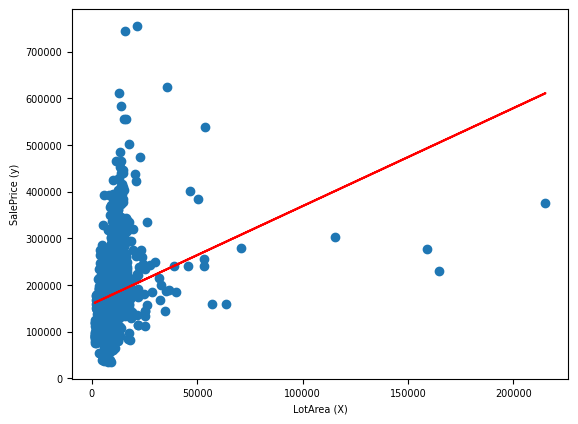

In [379]:
ols = OLS_formula(data = data, formula = "SalePrice ~ LotArea")
ols = ols.fit()
preds = ols.predict(data)

plt.scatter(data.LotArea, data.SalePrice)
plt.plot(data.LotArea, preds, c = "r")
plt.xlabel("LotArea (X)")
plt.ylabel("SalePrice (y)")

ols.params

In [380]:
from sklearn.metrics import r2_score

r2_score(data.SalePrice, preds)

0.0696133153821119

In [381]:
inf = ols.get_influence()

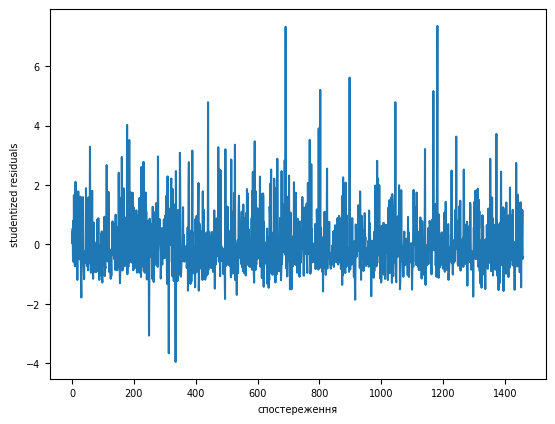

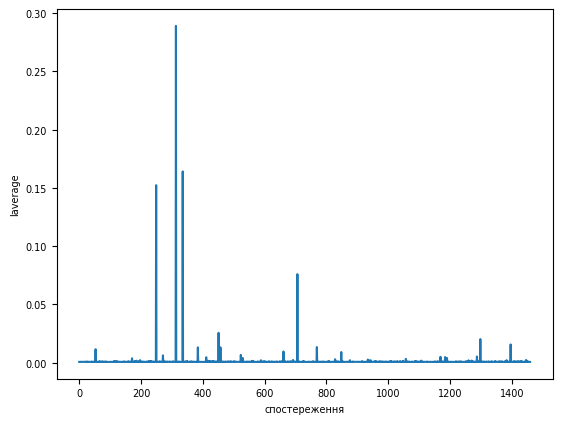

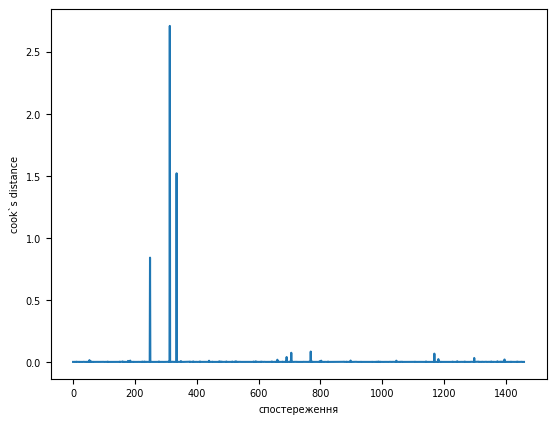

In [382]:
plt.plot(inf.resid_studentized_external) #  residuals
plt.xlabel("спостереження")
plt.ylabel("studentized residuals")
plt.show()
plt.plot(inf.hat_matrix_diag) #  laverage
plt.xlabel("спостереження")
plt.ylabel("laverage")
plt.show()
plt.plot(inf.cooks_distance[0]) #  cook`s distance
plt.xlabel("спостереження")
plt.ylabel("cook`s distance")
plt.show()

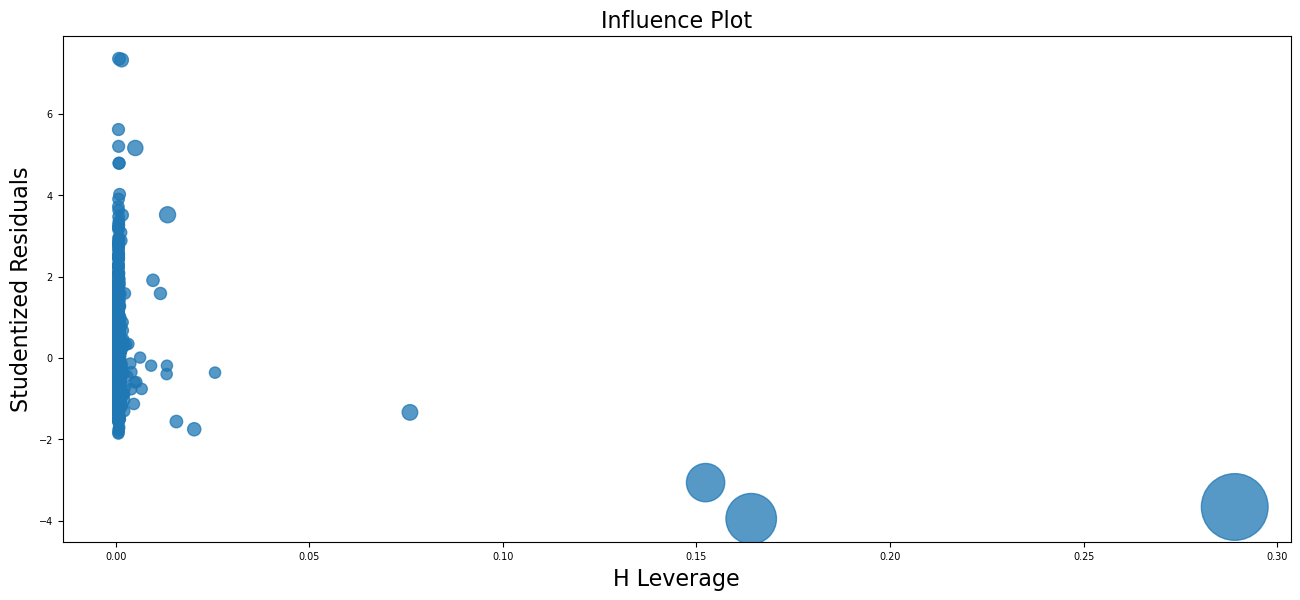

In [383]:
import statsmodels.api as sm

fig, ax = plt.subplots(figsize = (13,6))
plt.rc("font", size=7)

fig = sm.graphics.influence_plot(ols, ax = ax)
fig.tight_layout(pad=1.0)

for txt in fig.gca().texts:
    txt.set_visible(False)

plt.show()

In [384]:
data_inf = selected_data.copy()

data_inf["cook"] = inf.cooks_distance[0]
data_inf["laverage"] = inf.hat_matrix_diag
data_inf["resid"] = inf.resid_studentized_external

data_inf["preds"] = ols.predict(add_constant(selected_data[['LotArea']]))
top15 = data_inf.sort_values("cook", ascending = False).head(15)
top15

,SalePrice,LotArea,GarageArea,TotalBsmtSF,OpenPorchSF,cook,laverage,resid,preds
313,375000,215245,513,2136,0,2.706603,0.289041,-3.664488,610844.614642
335,228950,164660,529,1499,0,1.519338,0.164149,-3.953260,504617.533465
249,277000,159000,389,1444,98,0.839842,0.152365,-3.065654,492731.692218
769,538000,53504,841,1650,36,0.083378,0.013398,3.517874,271193.051201
706,302000,115149,739,1643,48,0.073715,0.076004,-1.339147,400645.822164
1169,625000,35760,807,1930,76,0.066640,0.005069,5.159478,233931.148890
691,755000,21535,832,2444,50,0.039384,0.001520,7.321472,204059.047877
1298,160000,63887,1418,6110,292,0.031804,0.020281,-1.754151,292997.059976
1182,745000,15623,813,2396,78,0.022560,0.000864,7.352250,191644.013698
1396,160000,57200,572,747,0,0.019484,0.015678,-1.564929,278954.547535


Text(0, 0.5, 'SalePrice (y)')

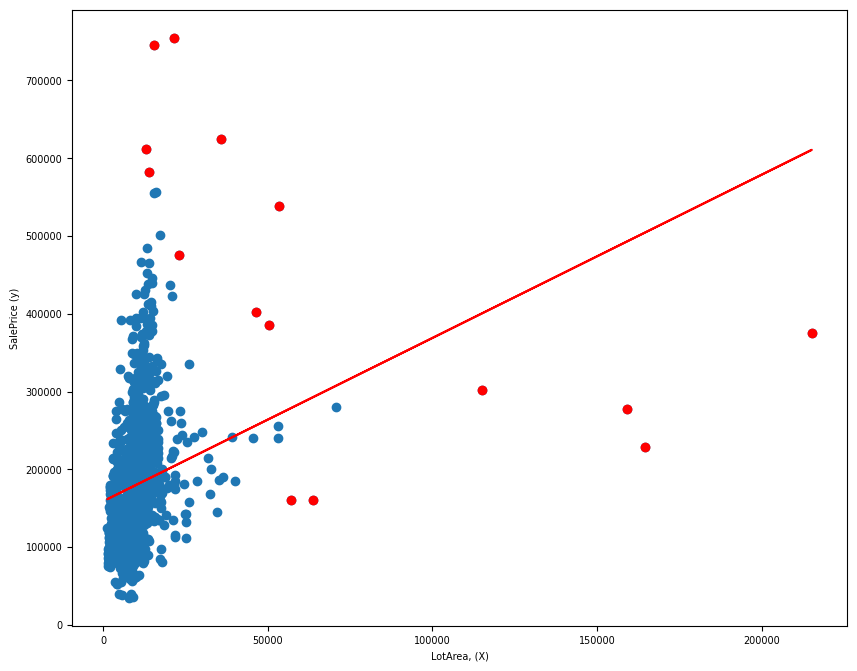

In [385]:
# predictions
plt.figure(figsize = (10,8))
plt.scatter(data.LotArea, data.SalePrice)
plt.plot(data.LotArea, preds, c = "r")
plt.scatter(top15.LotArea, top15.SalePrice, c = "r")
plt.xlabel("LotArea, (X)")
plt.ylabel("SalePrice (y)")

З наших графіків спостережння видно, що у нас є аутлаєри. Важливо зазначити, що аутлаєри дещо відрізняються в залежності від мір, які ми використовуємо для визначення аутлаєрів. Це пов'язано з тим, що різні метрики мають різний фокус і аналізують різні аспекти даних (наприклад, Laverage враховує дані по осі X лише).

За допомогою Influence Plot ми можемо краще проілюструвати явні аутлаєри, і їх щонайменше 15. Далі ми застоували формулу, щоб показати топ 15 аутлаєрів. Брати більше число не було сенсу, так як на графіку видно потенційні аутлайнери, і ми можемо їх порахувати.

У наступному кроці ми видалимо з наших даних аутлаєри.

In [386]:
clean_data = data[(data['LotArea'] <= 53000) & (data['SalePrice'] <= 380000)]

clean_ols = OLS_formula(data = clean_data, formula = "SalePrice ~ LotArea")
clean_ols = clean_ols.fit()
clean_preds = ols.predict(clean_data)

clean_ols.params

Intercept    126198.981802
LotArea           4.784606
dtype: float64

In [387]:
from sklearn.metrics import r2_score

r2_score(clean_data.SalePrice, clean_preds)

0.06537958314031189

Text(0, 0.5, 'SalePrice (y)')

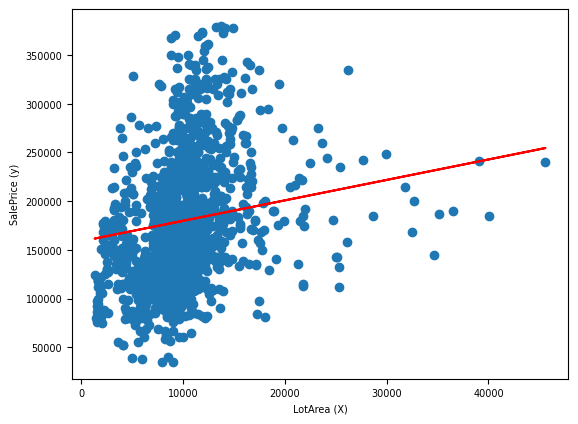

In [388]:
plt.scatter(clean_data.LotArea, clean_data.SalePrice)
plt.plot(clean_data.LotArea, clean_preds, c = "r")

plt.xlabel("LotArea (X)")
plt.ylabel("SalePrice (y)")

Після видалення аутлайнерів, коефіцієнт для LotArea змінився з 2.09 до 4.78. Тобто наші аутлаєри робили значення для площі території меншими ніж вони насправді є. Тому, ми могли недооцінювати впливу LotArea на SalePrice.

Також, ми проаналізували R-квадрат у 'брудних' та 'чистих' даних. Бачимо, що він змінився з 0.0696 на 0.0653. Різниця не суттєва, але вона все ж є. Що означає, аутлаєри, які ми видалили, можуть бути менш впливовими на наші результати. Обмежений вплив аутлайнерів на нашу регресійну модель можна пояснити тим, що кількість аутлаєрів у наших даних була невеликою в порівнянні з загальним обсягом даних.

# Завдання 5

In [389]:
ols = OLS_formula(data = data, formula = "SalePrice ~ YearBuilt + C(BldgType)")
ols = ols.fit()

print(ols.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.326
Model:                            OLS   Adj. R-squared:                  0.323
Method:                 Least Squares   F-statistic:                     140.4
Date:                Fri, 03 Nov 2023   Prob (F-statistic):          1.21e-121
Time:                        17:14:59   Log-Likelihood:                -18256.
No. Observations:                1460   AIC:                         3.652e+04
Df Residuals:                    1454   BIC:                         3.656e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept             -2.767e+

In [392]:
ols = OLS_formula(data = data, formula = "SalePrice ~ YearBuilt*BldgType")
ols = ols.fit()
print("\n------------------------------Add combinations")
print(ols.summary())


------------------------------Add combinations
                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.333
Model:                            OLS   Adj. R-squared:                  0.328
Method:                 Least Squares   F-statistic:                     80.27
Date:                Fri, 03 Nov 2023   Prob (F-statistic):          9.78e-121
Time:                        17:35:12   Log-Likelihood:                -18249.
No. Observations:                1460   AIC:                         3.652e+04
Df Residuals:                    1450   BIC:                         3.657e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------

In [394]:
ols = OLS_formula(data = data, formula = "SalePrice ~ YearBuilt*BldgType + np.log(SalePrice)")
ols = ols.fit()
print("\n------------------------------Add nonlinear")
print(ols.summary())


------------------------------Add nonlinear
                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.903
Model:                            OLS   Adj. R-squared:                  0.902
Method:                 Least Squares   F-statistic:                     1344.
Date:                Fri, 03 Nov 2023   Prob (F-statistic):               0.00
Time:                        17:46:05   Log-Likelihood:                -16843.
No. Observations:                1460   AIC:                         3.371e+04
Df Residuals:                    1449   BIC:                         3.377e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------

В даному завданні, я використала дещо інші дані з нашого датасету, а саме SalePrice, YearBuilt та BldgType. Ми бачимо, що початковий R-квадрат має значення 0.326, після логарифмування значення R-квадрату зросло до 0.903. Таке зростання R-квадрату може бути пов'язане зі зменшення масштабу великих чисел.

Серед плюсів трансформацій є можливість покращити прогностичні здатності моделі так як вони можуть допомогти їй краще адаптуватися до складних нелінійних залежностей між змінними. Один з основних мінусів трансформацій є складність інтерпретації, оскільки змінні перетворюються і можуть втрачати свої первинні значення, що ускладнює зв'язок з реальними явищами. Також, є ризик неправильному навчанні моделі через неправильний вибір трансформації. В такому випадку прогностичні здатності моделі можуть погіршитися.